In [1]:
#Tutorial：https://www.bilibili.com/video/BV1Ut411n78Z

# jupyter notebook 宽屏显示
from IPython.core.display import display,HTML
display(HTML('<style>.container {width:100% !important;}</style>'))

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# 查看iris字典里的所有键
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
iris.data.shape

(150, 4)

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Decision Tree

In [12]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(iris.data,iris.target)
clf

DecisionTreeClassifier(max_depth=4)

### Visualize the Deciision Tree

In [14]:
import pydotplus
from IPython.display import Image,display

In [15]:
dot_data = tree.export_graphviz(clf,
                               out_file=None,
                               feature_names = iris.feature_names,
                               class_names = iris.target_names,
                               filled=True,
                               rounded=True)

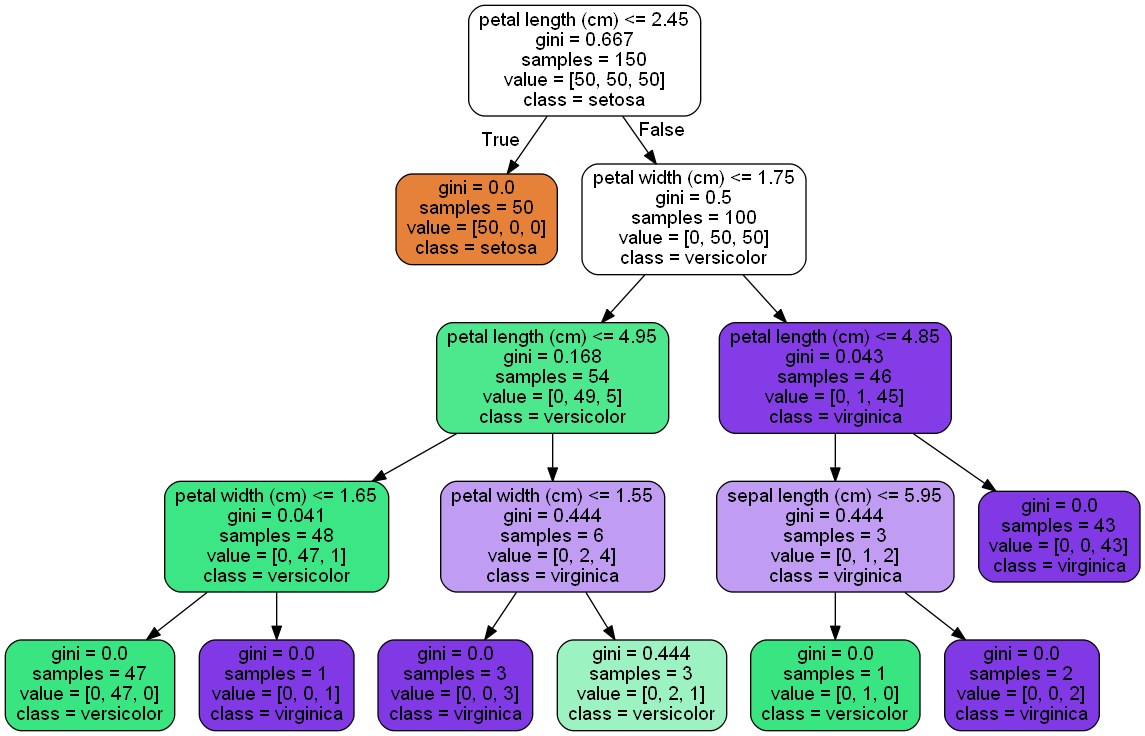

In [17]:
graph=pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

# 颜色越深，基尼指数越小，数据越纯

### Make predictions

In [18]:
clf.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
import numpy as np
a1=np.array([6.7,2.4,4.3,1.4])
a1

array([6.7, 2.4, 4.3, 1.4])

In [26]:
a1.shape

(4,)

In [27]:
a1.reshape(1,-1).shape

(1, 4)

In [28]:
clf.predict(a1.reshape(1,-1))
# 属于第二类鸢尾花

array([1])

In [30]:
# predict multiple data
a1 = iris.data[30]
a2 = iris.data[70]
a3 = iris.data[120]
b=np.row_stack((a1,a2,a3))
b

array([[4.8, 3.1, 1.6, 0.2],
       [5.9, 3.2, 4.8, 1.8],
       [6.9, 3.2, 5.7, 2.3]])

In [31]:
clf.predict(b)

array([0, 1, 2])

C:\Users\admin\anaconda3\envs\k1py37ml\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


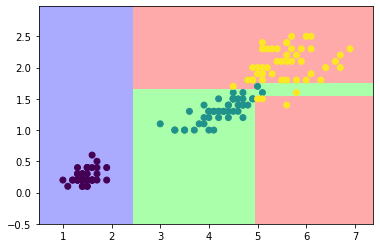

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn import tree

iris = datasets.load_iris()
x=iris.data[:,2:4] # 取出花瓣的长和宽
y=iris.target # 取出标签

#计算散点图的坐标上下界
x_min,x_max = x[:,0].min() - .5,x[:,0].max() + .5
y_min,y_max = -0.5,3
# y_min,y_max = [:,0].min() - .5,x[:,0].max() + .5

#绘制边界
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h=.02
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(x,y)
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx,yy,z,cmap=cmap_light)

plt.scatter(x[:,0],x[:,1],c=y)

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()

#只用了花瓣